# Recomendar una página

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
import random
random.seed(0)


In [2]:
columnas = ["Telefono","Edad","Página"]

In [3]:
clienteA = ["Iphone", 15, "https://athleanx.com/"]
clienteB = ["Iphone", 25, "https://www.chess.com/"]
clienteC = ["Android", 32, "https://www.lanacion.com.ar/"]
clienteD = ["Iphone", 35, "https://www.chess.com/"]
clienteE = ["Android", 12, "https://athleanx.com/"]
clienteF = ["Android", 14, "https://athleanx.com/"]

In [4]:
listado_de_clientes = [clienteA, clienteB, clienteC,clienteD,clienteE,clienteF]

In [5]:
dataframe = pd.DataFrame(listado_de_clientes, columns=columnas, index= ["ClienteA", "ClienteB", "ClienteC", "ClienteD", "ClienteE", "ClienteF"])
dataframe

,Telefono,Edad,Página
ClienteA,Iphone,15,https://athleanx.com/
ClienteB,Iphone,25,https://www.chess.com/
ClienteC,Android,32,https://www.lanacion.com.ar/
ClienteD,Iphone,35,https://www.chess.com/
ClienteE,Android,12,https://athleanx.com/
ClienteF,Android,14,https://athleanx.com/


dataset = {"cliente": ["ClienteA", "ClienteB", "ClienteC", "ClienteD", "ClienteE", "ClienteF"],
           "Telefono": ["Iphone", "Iphone", "Android", "Iphone", "Android", "Android"],
           "Página":["https://athleanx.com/", "www.chess.com", "https://www.lanacion.com.ar/", "https://www.chess.com/", "https://athleanx.com/", "https://athleanx.com/"],
           "Edad": [15, 25, 32, 35, 12, 14]}
pd.DataFrame(dataset)

In [8]:
dataframe

,Telefono,Edad,Página
ClienteA,Iphone,15,https://athleanx.com/
ClienteB,Iphone,25,https://www.chess.com/
ClienteC,Android,32,https://www.lanacion.com.ar/
ClienteD,Iphone,35,https://www.chess.com/
ClienteE,Android,12,https://athleanx.com/
ClienteF,Android,14,https://athleanx.com/


Queremos armar un app de recomendaciones basadas en árboles de decisión:
1. ¿Cual columna es más útil para la recomendación? (variable)
2. La variable splitea la data en dos partes
3. Repetir el proceso 1 y 2 para las partes más pequeñas

Queremos decidir que variable (Telefono o edad) es más útil para determinar quién va a elegir una página y tomar a esta variable cómo root del árbol. Después vamos a iterar sobre las ramas, siempre tomando la variable más detemrinante para cada bifuracion.

## A. Discretización de variables

Discretizar significa dividir la variable en subvariables. Por ejemplo, si tenemos una variable de edad, podemos dividirla en subvariables de edad de 0 a 10, de 11 a 20, de 21 a 30, etc. Es muy útil para tener insights en la data y para poder compararla con otras variables. Además de ser útiles en nuestro caso para ejemplificar el proceso de entrenamiento de un árbol de decisión.

Hay muchas maneras de lograrlo

In [9]:
def joven_adulto(edad):
    '''funcion que divide la edad en grupos de edad'''
    if edad <= 20:
        return "Joven"
    elif edad > 20:
        return "Adulto"

### A.1 Apply

Apply pertenece a la librería Pandas y sirve para aplicar una funcion a una columna.

En este caso, aplicamos la funcion young_Adulto a la columna edad. La columna edad se va a llenar con los valores de la funcion young_Adulto. Objetos que se pasan a apply son de tipo Series cuyo indice es un índice del dataframe o la columna.

```python
DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)[source]
```

In [10]:
dataframe["edad_discreta"] = dataframe["Edad"].apply(joven_adulto)
dataframe

,Telefono,Edad,Página,edad_discreta
ClienteA,Iphone,15,https://athleanx.com/,Joven
ClienteB,Iphone,25,https://www.chess.com/,Adulto
ClienteC,Android,32,https://www.lanacion.com.ar/,Adulto
ClienteD,Iphone,35,https://www.chess.com/,Adulto
ClienteE,Android,12,https://athleanx.com/,Joven
ClienteF,Android,14,https://athleanx.com/,Joven


### A.2 List Comprehension

Para discretizar con list comprehension podemos usar una lista de tuplas.

In [11]:
dataframe["edad_discreta_list_comprehsion"] = [joven_adulto(edad) for edad in dataframe["Edad"]]
dataframe

,Telefono,Edad,Página,edad_discreta,edad_discreta_list_comprehsion
ClienteA,Iphone,15,https://athleanx.com/,Joven,Joven
ClienteB,Iphone,25,https://www.chess.com/,Adulto,Adulto
ClienteC,Android,32,https://www.lanacion.com.ar/,Adulto,Adulto
ClienteD,Iphone,35,https://www.chess.com/,Adulto,Adulto
ClienteE,Android,12,https://athleanx.com/,Joven,Joven
ClienteF,Android,14,https://athleanx.com/,Joven,Joven


### A.3 Dataframe.loc
.loc sirve para acceder a una fila o columna de un dataframe. En este caso, accedemos a las filas  y a la columna "Edad". Asignamos el valor de la condición. Creamos una nueva columna con el valor de la condición.

In [12]:
dataframe.loc[dataframe["Edad"] <= 20,  'edad_discreta_loc'] = "Joven"
dataframe.loc[dataframe["Edad"] > 20,  'edad_discreta_loc'] = "Adulto"
dataframe

,Telefono,Edad,Página,edad_discreta,edad_discreta_list_comprehsion,edad_discreta_loc
ClienteA,Iphone,15,https://athleanx.com/,Joven,Joven,Joven
ClienteB,Iphone,25,https://www.chess.com/,Adulto,Adulto,Adulto
ClienteC,Android,32,https://www.lanacion.com.ar/,Adulto,Adulto,Adulto
ClienteD,Iphone,35,https://www.chess.com/,Adulto,Adulto,Adulto
ClienteE,Android,12,https://athleanx.com/,Joven,Joven,Joven
ClienteF,Android,14,https://athleanx.com/,Joven,Joven,Joven


### A.4 Dataframe.cut

Pandas.cut sirve para discretizar una variable también.

```python
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)[source]
```

Bin values into discrete intervals.

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

In [13]:
dataframe["edad_discreta_cut"] = pd.cut(dataframe["Edad"], bins=[0,20,99], labels=["Joven","Adulto"])
dataframe

,Telefono,Edad,Página,edad_discreta,edad_discreta_list_comprehsion,edad_discreta_loc,edad_discreta_cut
ClienteA,Iphone,15,https://athleanx.com/,Joven,Joven,Joven,Joven
ClienteB,Iphone,25,https://www.chess.com/,Adulto,Adulto,Adulto,Adulto
ClienteC,Android,32,https://www.lanacion.com.ar/,Adulto,Adulto,Adulto,Adulto
ClienteD,Iphone,35,https://www.chess.com/,Adulto,Adulto,Adulto,Adulto
ClienteE,Android,12,https://athleanx.com/,Joven,Joven,Joven,Joven
ClienteF,Android,14,https://athleanx.com/,Joven,Joven,Joven,Joven


### B. Drop Columns

In [14]:
columns_to_drop = [col for col in dataframe.columns if "_" in col]
columns_to_drop

['edad_discreta',
 'edad_discreta_list_comprehsion',
 'edad_discreta_loc',
 'edad_discreta_cut']

In [15]:
dataframe.drop(columns=columns_to_drop, inplace=True)
dataframe

,Telefono,Edad,Página
ClienteA,Iphone,15,https://athleanx.com/
ClienteB,Iphone,25,https://www.chess.com/
ClienteC,Android,32,https://www.lanacion.com.ar/
ClienteD,Iphone,35,https://www.chess.com/
ClienteE,Android,12,https://athleanx.com/
ClienteF,Android,14,https://athleanx.com/


## Elijo una manera de discretizar
Sobreescribo el nombre de la columna con el nombre de la variable discretizada

In [16]:
dataframe["Edad"] = dataframe["Edad"].apply(joven_adulto)

In [17]:
dataframe

,Telefono,Edad,Página
ClienteA,Iphone,Joven,https://athleanx.com/
ClienteB,Iphone,Adulto,https://www.chess.com/
ClienteC,Android,Adulto,https://www.lanacion.com.ar/
ClienteD,Iphone,Adulto,https://www.chess.com/
ClienteE,Android,Joven,https://athleanx.com/
ClienteF,Android,Joven,https://athleanx.com/


## Groupby
### Split por telefono

Renaming Columns After Groupy.
Sometimes you want to change the name of your columns after grouping to better describe the data they hold or you want to perform more than one operation on the same column (e.g. max and mean of the same column) without ending up with a MultiIndex. This can be achieved by passing a dictionary with your new column name as the key and a tuple with (old column name, operation) as a value to the agg function.

```python
df.groupby(grouping_column).agg(
    new_col_name =  ('old_col_name', 'sum'),
    new_col_name_2 = ('old_col_name', 'mean')
    )
```


In [18]:
dataframe.groupby("Telefono").agg(
    cantidad_de_clientes =  ('Página', 'count')
    )

,cantidad_de_clientes
Telefono,
Android,3
Iphone,3


In [19]:
dataframe.groupby(["Telefono","Página"]).agg(
    cantidad_de_clientes =  ('Página', 'count')
    )

cantidad_de_clientes
Telefono Página                                            
Android  https://athleanx.com/                            2
         https://www.lanacion.com.ar/                     1
Iphone   https://athleanx.com/                            1
         https://www.chess.com/                           2

<img alt="groupby" src="/Users/federicomoreno/PycharmProjects/curso/lewinger_moreno_ucema/figures/groupby.png"/>

## Joven or Adulto

Split por edad

In [20]:
dataframe.groupby(["Edad","Página"]).agg(
    cantidad_de_clientes =  ('Página', 'count')
    )

cantidad_de_clientes
Edad   Página                                            
Adulto https://www.chess.com/                           2
       https://www.lanacion.com.ar/                     1
Joven  https://athleanx.com/                            3

<img alt="groupby" src="/Users/federicomoreno/PycharmProjects/curso/lewinger_moreno_ucema/figures/split_edad.png"/>

# Accuracy

Accuracy es una métrica de performance que nos permite medir la exactitud de nuestra predicción.

* Clasificador 1: Qué télefono usas?
• Si la respuesta “iPhone,” entonces la mayoría usan chess.com y recomendamos entonces chess.com. Le vamos a pegar a 2 de 3.
• Pero si la respuesta es  “Android,” vamos a recomendar athlenx y le pegamos a 2 de 3.
* Clasificador 2: Cuál es tu edad?
• Si la respuesta es  “joven,” then we notice that all the Joven people downloaded Atom
Count, so that is the recommendation we make. We are correct three times out of three.
• Si la Respuesta es adulto recomendamos chess.com y estamos correctos dos de tres.

In [21]:
def clasificar_por_edad(edad):
    if edad == "Joven":
        return "https://athleanx.com/"
    elif edad == "Adulto":
        return "https://www.chess.com/"

def clasificar_por_telefono(Telefono):
    if Telefono ==  "Iphone":
        return "https://www.chess.com/"
    elif Telefono == "Android":
        return "https://athleanx.com/"

In [22]:
dataframe["split_edad"] = dataframe["Edad"].apply(clasificar_por_edad)
dataframe["split_telefono"] = dataframe["Telefono"].apply(clasificar_por_telefono)

In [23]:
dataframe["True_split_telefono"] = dataframe["Página"] == dataframe["split_telefono"]

In [24]:
dataframe.groupby(["True_split_telefono"]).agg(
    cantidad_de_clientes =  ('True_split_telefono', 'count')
    )

,cantidad_de_clientes
True_split_telefono,
False,2
True,4


In [23]:
accuracy_split_telefono = (4)/(5+1)
print(f"Accuracy Télefono: {accuracy_split_telefono}")

Accuracy Télefono: 0.6666666666666666


In [24]:
dataframe["True_split_edad"] = dataframe["Página"] == dataframe["split_edad"]
dataframe.groupby(["True_split_edad"]).agg(
    cantidad_de_clientes =  ('True_split_edad', 'count')
    )

,cantidad_de_clientes
True_split_edad,
False,1
True,5


In [25]:
accuracy_split_edad = (5)/(5+1)
print(f"Accuracy split_edad: {accuracy_split_edad}")

Accuracy split_edad: 0.8333333333333334


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(dataframe["Página"], dataframe["split_telefono"])

0.6666666666666666

In [28]:
accuracy_score(dataframe["Página"], dataframe["split_edad"])

0.8333333333333334

## Ejercicio

Escriba una función que devuelva el accuracy del modelo

In [29]:
def accuracy_model(df,true_column, predict_column):
    """Function that returns the accuracy of the model"""
    df["True_"+predict_column] = df[true_column] == df[predict_column]
    return df["True_"+predict_column].mean()

accuracy_model(dataframe, "Página", "split_telefono")

0.6666666666666666

In [30]:
accuracy_model(dataframe, "Página", "split_edad")

0.8333333333333334

# Gini impurity index


In a set with m elements and n classes, with ai elements belonging to the i-th class, the Gini impurity index is defined as:

    Gini(S) = 1 - sum(pi*(1-pi))

where S is the set of elements, pi is the proportion of elements belonging to the i-th class, and n is the number of classes.

El indice de gini permite comparar los splits al ser una medida de la diversidad. Si tenemos un set donde todos los elementos son similares, el indice de gini va a ser bajo y si todos los elementos son diferentes, el indice de gini va a ser alto.

In [31]:
elements = ['athleanx', 'athleanx', 'athleanx', 'chess', 'lanacion', 'chess']
def counts(elements):
    classes = {}
    for element in elements:
        if element in classes:
            classes[element] += 1
        else:
            classes[element] = 1
    return [classes[e] for e in classes]
counts(elements)

[3, 2, 1]

In [32]:
def gini(elements):
    cts = counts(elements)
    n = sum(cts)
    return 1 - sum([p_i**2/n**2 for p_i in cts])
gini(elements)

0.6111111111111112

Calsificador 1 (Por télefono)):
• hoja izquierda (iPhone): {athleanx, chess, chess}
• hoja derecha (Android): {athleanx, athleanx, lanacion}

In [33]:
#Clasificador 1.
#¿Es iphone?
si_iphone = gini(['athleanx', 'chess', 'chess'])
no_iphone = gini(['athleanx', 'athleanx', 'lanacion'])

gini_del_clasificador_1 = (si_iphone + no_iphone)/2
print(f"Gini del clasificador 1: {gini_del_clasificador_1}")

Gini del clasificador 1: 0.4444444444444444


Clasificador 2 (Por edad):
• hoja izquierda(Joven): {athleanx, athleanx, chess}
• hoja derecja(Adulto): {lanacion, chess, chess}

In [34]:
#Clasificador 2.
#¿Es joven?
si_joven = gini(['athleanx', 'athleanx', 'athleanx'])
no_joven = gini(['chess', 'lanacion', 'chess'])
print(f"Gini del clasificador 2: {(si_joven + no_joven)/2}")

Gini del clasificador 2: 0.2222222222222222


In [35]:
import numpy as np
def entropy(elements):
    if len(elements)==0:
        return 0
    cts = counts(elements)
    n = sum(cts)
    props = 1/n*np.array(cts)
    return -np.dot(np.log2(props), props)
entropy(elements)

1.4591479170272446

In [36]:
for i in range(len(elements)):
    print("************")
    left = elements[:i]
    right = elements[i:]
    print(left, right)
    weighted_gini = 1/len(elements)*(gini(left)*len(left) + gini(right)*len(right))
    print("Weighted Gini:", weighted_gini)
    weighted_entropy = 1/len(elements)*(entropy(left)*len(left) + entropy(right)*len(right))
    print("Weighted entropy:", weighted_entropy)

************
[] ['athleanx', 'athleanx', 'athleanx', 'chess', 'lanacion', 'chess']
Weighted Gini: 0.6111111111111112
Weighted entropy: 1.4591479170272443
************
['athleanx'] ['athleanx', 'athleanx', 'chess', 'lanacion', 'chess']
Weighted Gini: 0.5333333333333333
Weighted entropy: 1.268273412406135
************
['athleanx', 'athleanx'] ['athleanx', 'chess', 'lanacion', 'chess']
Weighted Gini: 0.41666666666666663
Weighted entropy: 1.0
************
['athleanx', 'athleanx', 'athleanx'] ['chess', 'lanacion', 'chess']
Weighted Gini: 0.2222222222222222
Weighted entropy: 0.4591479170272448
************
['athleanx', 'athleanx', 'athleanx', 'chess'] ['lanacion', 'chess']
Weighted Gini: 0.41666666666666663
Weighted entropy: 0.8741854163060886
************
['athleanx', 'athleanx', 'athleanx', 'chess', 'lanacion'] ['chess']
Weighted Gini: 0.4666666666666667
Weighted entropy: 1.1424588287122237


In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
app_dataset_one_hot = pd.DataFrame(
    {'Iphone':[1,1,0,1,0,0],
     'Android':[0,0,1,0,1,1],
     'Joven':[1,0,0,0,1,1],
     'Adulto':[0,1,1,1,0,0],
     'athleanx':[1,0,0,0,1,1],
     'lanacion':[0,0,1,0,0,0],
     'chess':[0,1,0,1,0,0]})
app_dataset_one_hot

,Iphone,Android,Joven,Adulto,athleanx,lanacion,chess
0,1,0,1,0,1,0,0
1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0
5,0,1,1,0,1,0,0


In [39]:
app_dataset_one_hot[['Iphone','Android','Adulto','Joven']]

,Iphone,Android,Adulto,Joven
0,1,0,0,1
1,1,0,1,0
2,0,1,1,0
3,1,0,1,0
4,0,1,0,1
5,0,1,0,1


In [40]:
X = app_dataset_one_hot[['Iphone','Android','Adulto','Joven']]
y = app_dataset_one_hot[['athleanx','lanacion','chess']]

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)
dt.score(X,y)

1.0

[Text(133.92000000000002, 181.2, 'X[2] <= 0.5\ngini = 0.407\nsamples = 6\nvalue = [[3, 3]\n[5, 1]\n[4, 2]]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [[0, 3]\n[3, 0]\n[3, 0]]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 0.5\ngini = 0.296\nsamples = 3\nvalue = [[3, 0]\n[2, 1]\n[1, 2]]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [[2, 0]\n[2, 0]\n[0, 2]]')]

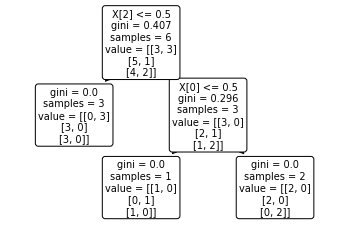

In [42]:
tree.plot_tree(dt, rounded=True)
